## Bibliotecas 

In [23]:

import  statistics
import  numpy  as np
import  pandas as pd
import  matplotlib.pyplot as plt
import  seaborn as sns; sns.set()
import  sklearn.metrics as mt

from    time import time 
from    sklearn.metrics import confusion_matrix
from    sklearn.tree import DecisionTreeClassifier   
from    sklearn.cross_validation import train_test_split    


## Funções de Apoio

In [24]:

# Nenhuma função ainda escrita...


## Análise Base de Dados & Limpeza

In [25]:

# carrega base de dados
df  =  pd.read_csv( '1. baseDeDados_Original.csv' )

# exibe os 5 primeiro registros
df.head( 5 )


,id_cliente,cla_cliente,tot_orcamento,fat_cliente,des_orcamento,por_desconto,fec_orcamentos,rec_orcamentos
0,100,L,7290,7070,220,"00,03",2,9
1,101,J,6050,5980,70,"00,01",6,1
2,102,F,15210,14290,920,"00,06",5,6
3,103,F,11540,11300,240,"00,02",1,9
4,104,K,1900,1820,80,"00,04",6,6


In [26]:

# renomeia colunas
df = df.rename( columns = {  'cla_cliente'      :   'classificação'            ,   
                             'tot_orcamento'    :   'total orçamento'          ,
                             'fat_cliente'      :   'faturamento cliente'      ,
                             'des_orcamento'    :   'desconto orçamento'       ,
                             'por_desconto'     :   'porcentagem de desconto'  ,
                             'fec_orcamentos'   :   'qtd. fechados'            ,
                             'rec_orcamentos'   :   'qtd. recusados'           })

# exibe os 5 primeiro registros
df.head( 5 )


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados
0,100,L,7290,7070,220,"00,03",2,9
1,101,J,6050,5980,70,"00,01",6,1
2,102,F,15210,14290,920,"00,06",5,6
3,103,F,11540,11300,240,"00,02",1,9
4,104,K,1900,1820,80,"00,04",6,6


In [27]:

# verifica o total de registros na base de dados que estejam em branco ( nulos )
print( "{:0>4} : total de registros ( células ) vazios!" .format( sum( df.isnull().sum())))


0000 : total de registros ( células ) vazios!


In [28]:

# exibe o tipo de dados em cada coluna
df.dtypes


id_cliente                  int64
classificação              object
total orçamento             int64
faturamento cliente         int64
desconto orçamento          int64
porcentagem de desconto    object
qtd. fechados               int64
qtd. recusados              int64
dtype: object

In [29]:

# filtra registros de pessoas que não tenham apresentado gastos no período determinado, ou seja,
# não são consideradas clientes no próximo período
df[ df[ 'total orçamento' ] == 0 ]


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados
249,349,Z,0,0,0,"00,00",0,5
485,585,Z,0,0,0,"00,00",0,8
639,739,Z,0,0,0,"00,00",0,2
925,1025,Z,0,0,0,"00,00",0,7
950,1050,Z,0,0,0,"00,00",0,3
1239,1339,Z,0,0,0,"00,00",0,5
1248,1348,Z,0,0,0,"00,00",0,4
1579,1679,Z,0,0,0,"00,00",0,2


In [30]:

# remove registros de pessoas que no período não apresentaram gastos ( resíduo / lixo dep. DataScience )
df = df.drop([ 249, 485, 639, 925, 950, 1239, 1248, 1579 ])


In [31]:

# verifica exclusão de registros
df[ df[ 'total orçamento' ] == 0 ]


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados


In [32]:

# salva dataFrame sem registros inválidos
df.to_csv( '2. baseDeDados_Limpa.csv', index=False )


## Benchmark: Árvore de Decisão

In [33]:

# desmembra base de dados em dados de entrada ( dfX ) e dados de saída ( dfy )
dfX  =  df
dfX  =  df.drop( [ 'classificação', 'porcentagem de desconto' ], axis=1 )
dfy  =  df[ 'classificação' ]


In [34]:

# a função train_tes_split desmembra o DataFrame em conjuntos de treinamento (aprendizado) e teste
# O parâmetro test_size indica um valor percentual (expresso de modo decimal) de quantos registros
# serão reservados para o teste, o residual será destinado para o treinamento
X_train, X_test, y_train, y_true = train_test_split( dfX, dfy, test_size=0.30, random_state=42 )


# atribui o tempo a variável
t0 = time()


# cria Árvore de Decisão de Classificação
model = DecisionTreeClassifier( random_state=42, max_depth=2, min_samples_leaf=2, min_samples_split=2 )


# treina o modelo
model.fit( X_train, y_train )


# faz previsões usando o modelo
y_predTrain  =  model.predict( X_train )
y_predTest   =  model.predict( X_test  )


# atribui o tempo a variável
t1  =  time()


In [35]:

# exibe quanto tempo o algoritmo levou para aprender “algo”
print( "{:7.2f} : Tempo de treinamento" .format( round( t1-t0, 3)))    

# calcula o f1_score do novo modelo e o exibe para o treinamento e para o teste
print( '{:7.2f} : F1 Score de treinamento.' .format( mt.f1_score( y_train, y_predTrain, average='micro' )))
print( '{:7.2f} : F1 Score de teste.'       .format( mt.f1_score( y_true,  y_predTest,  average='micro' )))


   0.00 : Tempo de treinamento
   0.58 : F1 Score de treinamento.
   0.57 : F1 Score de teste.


Text(180.98,0.5,'y: predição')

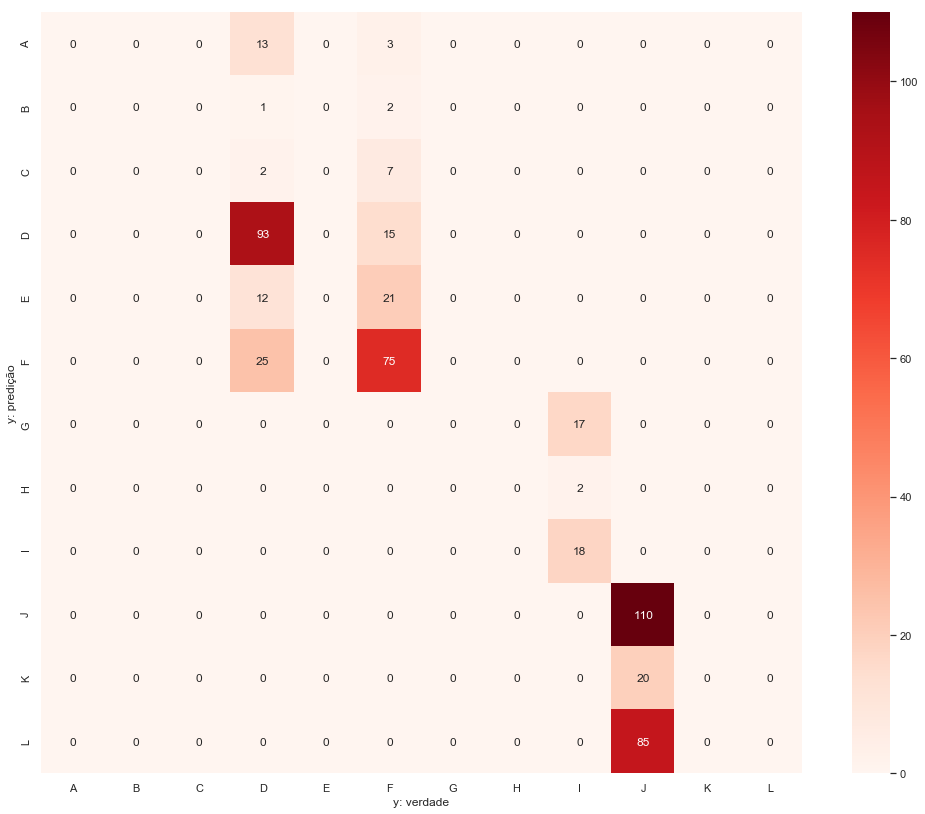

In [36]:

# define o tamanho do gráfico
plt.figure( figsize = ( 18, 14 ))


# exibe matriz confusão em cores
labels   =   [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L' ]
mat      =   confusion_matrix( y_true, y_predTest )
sns.heatmap( mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=labels, yticklabels=labels , cmap="Reds" )


# configura eixos
plt.xlabel( 'y: verdade'  )
plt.ylabel( 'y: predição' ) 


In [37]:

# exibe matriz confusão SEM cores
print( mt.confusion_matrix( y_true, y_predTest ))


[[  0   0   0  13   0   3   0   0   0   0   0   0]
 [  0   0   0   1   0   2   0   0   0   0   0   0]
 [  0   0   0   2   0   7   0   0   0   0   0   0]
 [  0   0   0  93   0  15   0   0   0   0   0   0]
 [  0   0   0  12   0  21   0   0   0   0   0   0]
 [  0   0   0  25   0  75   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0  18   0   0   0]
 [  0   0   0   0   0   0   0   0   0 110   0   0]
 [  0   0   0   0   0   0   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0  85   0   0]]


In [38]:

# exibe relatório de classificação, apresentando as principais métricas de avaliação de um modelo
print( mt.classification_report( list( y_true ), list( y_predTest ), target_names=labels ))


             precision    recall  f1-score   support

          A       0.00      0.00      0.00        16
          B       0.00      0.00      0.00         3
          C       0.00      0.00      0.00         9
          D       0.64      0.86      0.73       108
          E       0.00      0.00      0.00        33
          F       0.61      0.75      0.67       100
          G       0.00      0.00      0.00        17
          H       0.00      0.00      0.00         2
          I       0.49      1.00      0.65        18
          J       0.51      1.00      0.68       110
          K       0.00      0.00      0.00        20
          L       0.00      0.00      0.00        85

avg / total       0.37      0.57      0.45       521



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
